In [1]:
from greenlearning.utils import DataProcessor
from greenlearning.model import *
from chebpy2 import Chebfun2, cheb2prefs
import matplotlib.pyplot as plt

%env TF_MLC_LOGGING=1
%env TF_CPP_MIN_LOG_LEVEL=2

env: TF_MLC_LOGGING=1
env: TF_CPP_MIN_LOG_LEVEL=2


In [2]:
model = Model(loadPath = "savedmodel")

Metal device set to: Apple M1 Pro


In [3]:
%%time
g = Chebfun2(model.evaluateG, domain = [0, 1, 0, 1], prefs = cheb2prefs)

CPU times: user 508 ms, sys: 122 ms, total: 629 ms
Wall time: 547 ms


In [4]:
g

chebfun2 object
     domain       rank               corner values
[0,1] x [0,1]     43       [0.005792 0.000321 0.000772 -0.001207]
vertical scale = 0.005792

In [5]:
xx = np.linspace(0,1,2000)
yy = np.linspace(0,1,2000)
x, y = np.meshgrid(xx,yy)

In [6]:
%%time
Gneural = model.evaluateG(x,y)

# plt.contourf(x,y,Gneural, 50, cmap = 'turbo', vmin = np.min(Gneural), vmax = np.max(Gneural))
# plt.colorbar()

CPU times: user 165 ms, sys: 396 ms, total: 561 ms
Wall time: 927 ms


CPU times: user 2.34 s, sys: 1.44 s, total: 3.77 s
Wall time: 1.47 s


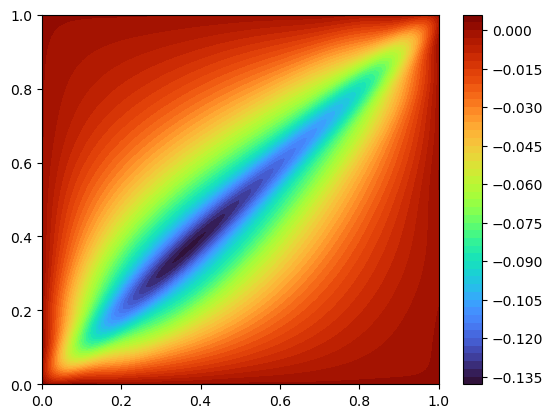

In [7]:
%%time
G = g[x,y]

plt.contourf(x,y,G, 50, cmap = 'turbo', vmin = np.min(G), vmax = np.max(G))
plt.colorbar()

In [8]:
%%time
U, S, V = g.svd()

CPU times: user 15.6 s, sys: 117 ms, total: 15.7 s
Wall time: 15.5 s
